autoformation pandas Régis sur données eutrophisation melina



In [1]:
print 'hello'

hello


In [2]:
import pandas as pd 

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt

#### POur mémoire, récupérer les attributs d'une couche dans QGIS

# creation d'objet

### création d'une série, indexation numérique par défaut

In [ ]:
s= pd.Series([1,3,5,np.nan,6,8])

In [ ]:
s

### création d'un tableau de date dataframe avec index sur date et colonnes étiquettée (via un tableau numPy)

In [ ]:
dates = pd.date_range('20130101', periods=6)

In [ ]:
dates

In [ ]:
df = pd.DataFrame(np.random.randn(6,4),index=dates,columns=list('ABCD'))

In [ ]:
df

In [ ]:
df2= pd.DataFrame({'A' : 1.,
                   'B' : pd.Timestamp('20130102'),
                   'C' : pd.Series(2,index=list(range(4)),dtype='float32'),
                   'D' : np.array([3] * 4,dtype='int32'),
                   'E' : pd.Categorical(["test","train","test","train"]),
                   'F' : 'foo' })

In [ ]:
df2

In [ ]:
df.dtypes


In [ ]:
df2.dtypes

In [ ]:
df.abs

In [ ]:
df.A

In [ ]:
df.head()

In [ ]:
df.tail(2)

In [ ]:
df.index

In [ ]:
df.columns

In [ ]:
df.values

In [ ]:
df.describe()

In [ ]:
df.T

# Essai sur les données qualité hébergées sur postgres

## Connection postgres 

In [5]:
import psycopg2
import sys
import pprint


conn_string = "host='pgpool' dbname='refgeo2' user='visu' password='visu'"
 
# print the connection string we will use to connect
print "Connecting to database\n	->%s" % (conn_string)

# get a connection, if a connect cannot be made an exception will be raised here
conn = psycopg2.connect(conn_string)

# conn.cursor will return a cursor object, you can use this cursor to perform queries
cursor = conn.cursor()
print "Connected!\n"

Connecting to database
	->host='pgpool' dbname='refgeo2' user='visu' password='visu'
Connected!



## Execution d'un select http://nbviewer.ipython.org/github/jvns/pandas-cookbook/blob/master/cookbook/Chapter%209%20-%20Loading%20data%20from%20SQL%20databases.ipynb

## Select dans dataframe panda

In [9]:
sql = 'SELECT code_sandre_stq, code_parametre, dateheure date, resultat_l_analyse result, unite, libunite, code_remarque FROM temp.test_data_qual_perf where code_sandre_stq = \'05161000\';'

In [10]:
eutroDf = pd.read_sql(sql, conn, index_col='date', parse_dates= 'date' )

In [11]:
eutroDf.describe()

C:\OSGEO4~1\apps\Python27\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,code_parametre,result,unite,code_remarque
count,826.000000,826.000000,757.000000,826.000000
mean,1420.449153,6.006562,171.073976,1.773608
std,458.670485,11.662236,59.328405,2.524226
min,1022.000000,0.030000,27.000000,1.000000
25%,1305.000000,0.100000,NaN,1.000000
50%,1335.000000,3.000000,NaN,1.000000
75%,1350.000000,8.300000,NaN,1.000000
max,6335.000000,169.000000,292.000000,10.000000


In [ ]:
eutroDf.index

In [ ]:
eutroDf.columns

## Exploration statistique

In [ ]:
eutroDf['result'].value_counts().sort

group by year , trimestre

In [ ]:
eutroDf.resample('1A', how=['mean', 'median'])

In [ ]:
eutroDf.resample('3M', how='mean')

Plot ? module spécifique matplotlib pour notebook

In [12]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [ ]:
moy_trimestre = eutroDf['result'].resample('3M', how='mean')

In [ ]:
moy_trimestre.plot()

In [ ]:
stats_trimestre = eutroDf['result'].resample('2M', how=['mean', np.min,np.median])

In [ ]:
stats_trimestre.plot()

In [13]:
dfNP = pd.read_sql("select nitr.dateheure, nitr.code_stq, nitr.result as result_nitr, phos.result as result_phos FROM (SELECT distinct ON (dateheure, code_sandre_stq , code_parametre) dateheure, code_sandre_stq code_stq, code_parametre, resultat_l_analyse result FROM temp.test_data_qual_perf WHERE (code_parametre = 1340) order by code_stq) nitr JOIN (SELECT distinct ON (dateheure, code_sandre_stq , code_parametre) dateheure, code_sandre_stq code_stq, code_parametre, resultat_l_analyse result FROM temp.test_data_qual_perf WHERE (code_parametre = 1350)) phos ON (nitr.dateheure=phos.dateheure and nitr.code_stq = phos.code_stq)", conn, index_col ='dateheure', parse_dates= 'dateheure')

In [14]:
dfNP

,code_stq,result_nitr,result_phos
dateheure,,,
2008-01-21,05000110,3.90,0.250
2008-03-17,05000110,14.60,0.200
2008-05-19,05000110,33.80,0.070
2008-07-21,05000110,25.20,0.230
2008-09-15,05000110,15.80,0.120
2008-11-18,05000110,0.90,0.650
2009-01-19,05000110,43.50,0.500
2009-03-19,05000110,43.80,0.200
2009-05-11,05000110,28.90,0.130


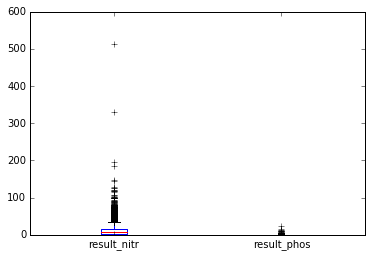

In [55]:
dfNP.plot(kind='box')

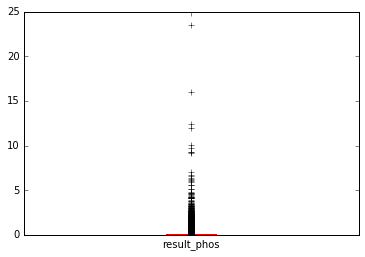

In [54]:
dfNP['result_phos'].plot(kind='box')

C:\OSGEO4~1\apps\Python27\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  if __name__ == '__main__':


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000000007ED43C8>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x00000000080B1C50>], dtype=object)

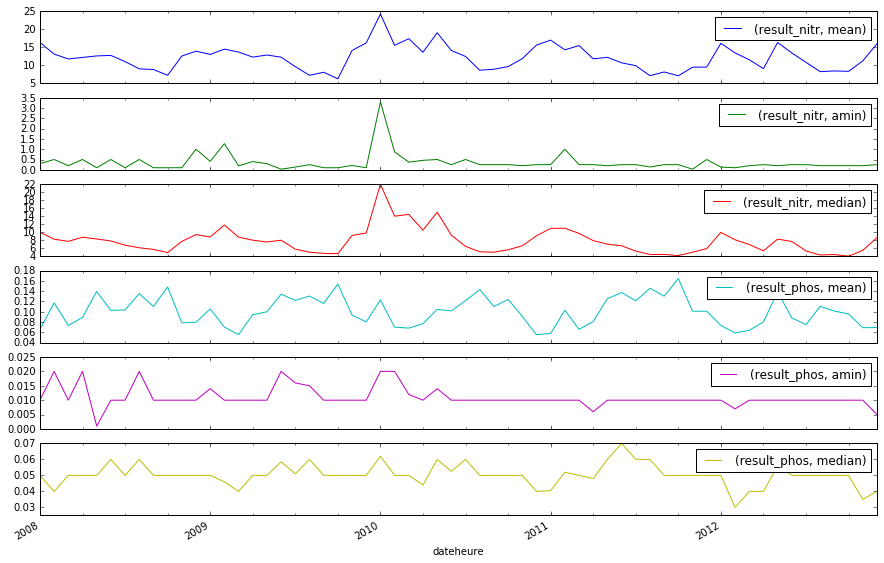

In [15]:
dfNP.resample('1M', how=['mean', np.min,np.median]).plot(kind='line',logy=False, subplots=True, figsize=(15,10))

In [16]:
import plotly.plotly as py
py.sign_in('regis.haubourg', 'qyh9ssvz4u')
from plotly.graph_objs import *

C:\OSGEO4~1\apps\Python27\lib\site-packages\requests\packages\urllib3\util\ssl_.py:318: SNIMissingWarning: An HTTPS request has been made, but the SNI (Subject Name Indication) extension to TLS is not available on this platform. This may cause the server to present an incorrect TLS certificate, which can cause validation failures. You can upgrade to a newer version of Python to solve this. For more information, see https://urllib3.readthedocs.org/en/latest/security.html#snimissingwarning.
  SNIMissingWarning
C:\OSGEO4~1\apps\Python27\lib\site-packages\requests\packages\urllib3\util\ssl_.py:122: InsecurePlatformWarning: A true SSLContext object is not available. This prevents urllib3 from configuring SSL appropriately and may cause certain SSL connections to fail. You can upgrade to a newer version of Python to solve this. For more information, see https://urllib3.readthedocs.org/en/latest/security.html#insecureplatformwarning.
  InsecurePlatformWarning


C:\OSGEO4~1\apps\Python27\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  if __name__ == '__main__':


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000B484400>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000000000B150D30>], dtype=object)

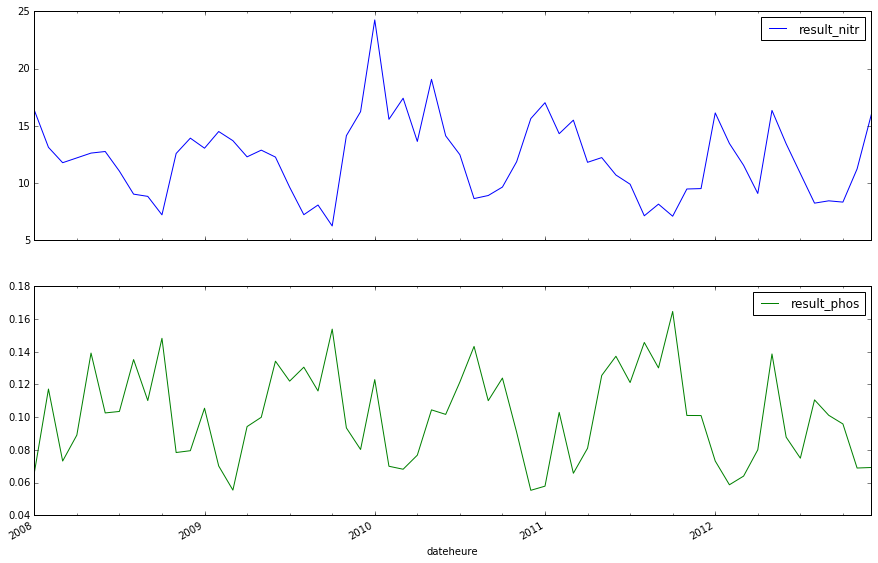

In [57]:
dfNP.resample('1M', how='mean').plot(kind='line', logy=False, subplots=True, figsize=(15,10))

ImportError: DLL load failed: Le module spécifié est introuvable.

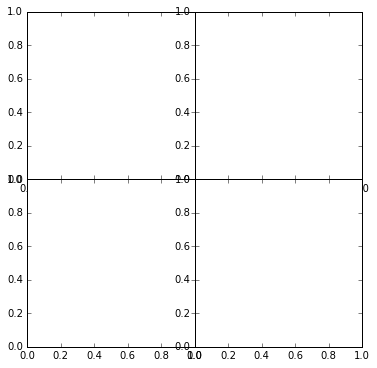

In [58]:
pd.scatter_matrix(dfNP, alpha=0.2, figsize=(6,6), diagonal='kde')


In [ ]:
dfNP1mois=dfNP.resample('1M', how='mean')

In [ ]:
dfNP1mois.plot(kind='scatter', x='result_nitr', y='result_phos', s=dfNP1mois['result_nitr']*100, logy=False, figsize=(15,10), alpha=0.2)

In [ ]:
from pandas.tools.plotting import lag_plot


In [ ]:
lag_plot(dfNP1mois['result_phos'])

### Essais de construction de dataframe from QGIS 

In [ ]:
dictRow1 = {u'nom': u'Xhonneux', u'direction': 67, u'id': 1, u'statut': u'normale'}

In [ ]:
dictRow2 = {u'nom': u'Moulin', u'direction': 80, u'id': 2, u'statut': u'chevauch'}

In [ ]:
dictTable = {'row1':{'nom': 'Xhonneux', 'direction': 67, 'id': 1, 'statut': 'normale'}}

In [ ]:
dictTable['row2'] = dictRow2

In [ ]:
dfFromDic = pd.DataFrame.from_dict(dictTable, orient='index')

In [ ]:
dfFromDic

##### Passer par des listes pour construire le dataframe evite la redondance de données. 